# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
# ... ENTER YOUR CODE HERE
import numpy as np
def get_design_matrix(x, m):
    x_arr = np.array(x)
    design_matrix = np.empty((len(x), m+1))
    for i in range(m+1):
        design_matrix[:, i] = x_arr**i
        
    return design_matrix

In [3]:
def solve_normal_equations(A, y, residual=False):
    y_arr = np.array(y)
    coeffs = np.linalg.solve(A.T @ A, A.T @ y_arr)
    if residual:
        res = np.dot(A, coeffs) - y_arr
        return coeffs, np.dot(res, res) 
    return coeffs

In [4]:
M = 10

coeffs = []
for m in range(M+1):
    coeffs.append(solve_normal_equations(get_design_matrix(x, m), y, residual=True))

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [5]:
# ... ENTER YOUR CODE HERE ...
for z in coeffs:
    print("m = %d:" % (len(z[0]) - 1), z[1]/(len(x) - len(z[0]) - 1))

m = 0: 8.648514871794871
m = 1: 5.1919185111572395
m = 2: 2.899504633502665
m = 3: 0.014965078919677943
m = 4: 0.015229387046512213
m = 5: 0.015750074100413302
m = 6: 0.014902474757922878
m = 7: 0.016385389008582284
m = 8: 0.016197120134625535
m = 9: 0.01939656777280571
m = 10: 0.02376319932066193


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

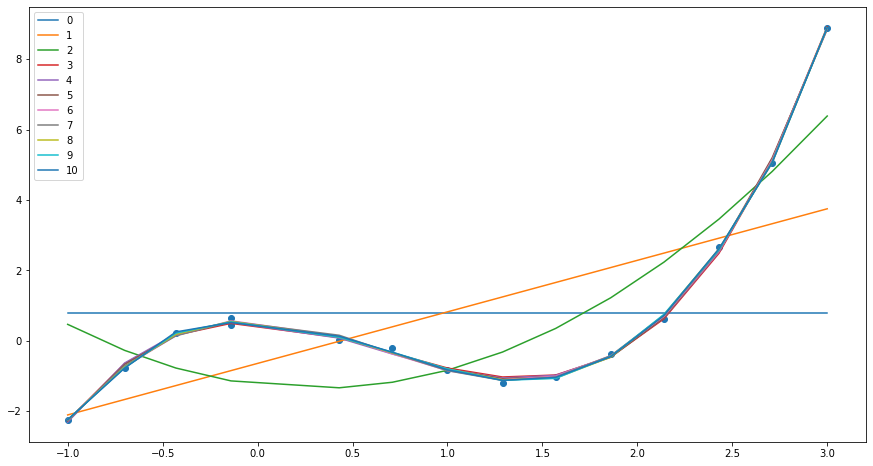

In [6]:
# ... ENTER YOUR CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
#plt.plot(x, y, 'o')
plt.scatter(x, y)

for z in coeffs:
    polynom = np.poly1d(z[0][::-1])
    
    plt.plot(x, polynom(x))
    
plt.legend(list(range(0, M+1)))

As can be seen, each polynom of degree higher than 2 is quite accurate. It is consistent with the previous paragraph.

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [7]:
# ... ENTER YOUR CODE HERE ...
coeffs_qr = []

for m in range(M+1):
    q, r = np.linalg.qr(get_design_matrix(x, m), mode='complete')
    r1 = r[:m+1]
    y1 = np.dot(q.T, y)[:m+1]
    coeffs_qr.append(np.linalg.solve(r1, y1))

In [8]:
coeffs_ = [z[0] for z in coeffs]

for i in range(M+1):
    print("m = %d:" % i, np.abs(coeffs_[i] - coeffs_qr[i]).sum())

m = 0: 0.0
m = 1: 5.551115123125783e-16
m = 2: 4.6629367034256575e-15
m = 3: 1.1457501614131615e-13
m = 4: 5.04721264782404e-13
m = 5: 3.506490237059623e-12
m = 6: 1.3367286444410098e-11
m = 7: 5.455409561594404e-11
m = 8: 8.122872454524588e-09
m = 9: 8.954326891769115e-08
m = 10: 1.0826876894028115e-05


As can be seen, the absolute difference between coefficients is quite small

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [9]:
# ... ENTER YOUR CODE HERE ...
def lagrange_poly(x, nodes, k):
    value = 1.0
    for i in range(len(nodes)):
        if i == k:
            continue
        value *= (x - nodes[i])/(nodes[k] - nodes[i])
        
    return value

def lagrange(x, nodes, y):
    return np.sum(y[j]*lagrange_poly(x, nodes, j) for j in range(len(nodes)))

In [10]:
temp = np.random.uniform(np.pi/2, np.pi, 1)

c:\users\proko\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':


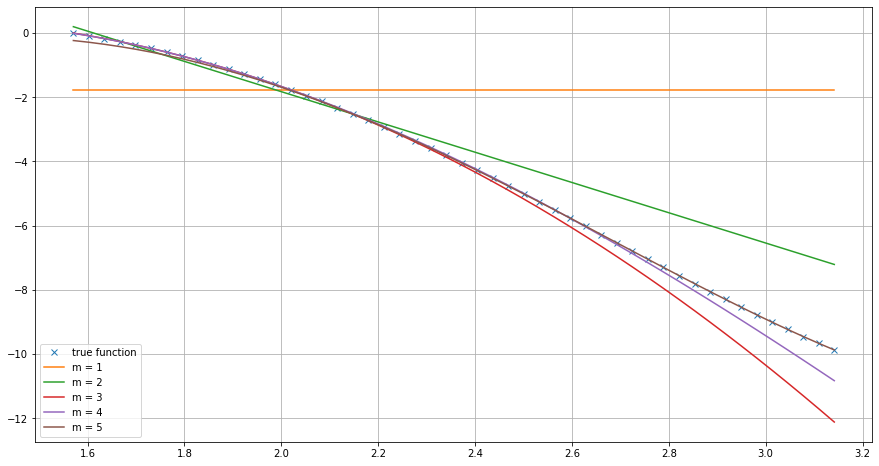

In [11]:
f = lambda x: x**2 * np.cos(x)
x_space = np.linspace(np.pi/2, np.pi)

plt.figure(figsize=(15, 8))
plt.plot(x_space, f(x_space), 'x', label='true function')

for m in range(1, 6):
    nodes = np.random.uniform(np.pi/2, np.pi, m)
    plt.plot(x_space, [lagrange(x_, nodes, f(nodes)) for x_ in x_space], label='m = %d' % m)
plt.grid()
plt.legend()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [12]:
# ... ENTER YOUR CODE HERE ...
def chebyshev_nodes(a, b, n):
    nodes = []
    for i in range(n):
        x = 0.5*(a+b) + 0.5*(b-a)*np.cos((2*i+1)*np.pi/(2*n))
        nodes.append(x)
        
    return np.array(nodes)

c:\users\proko\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':


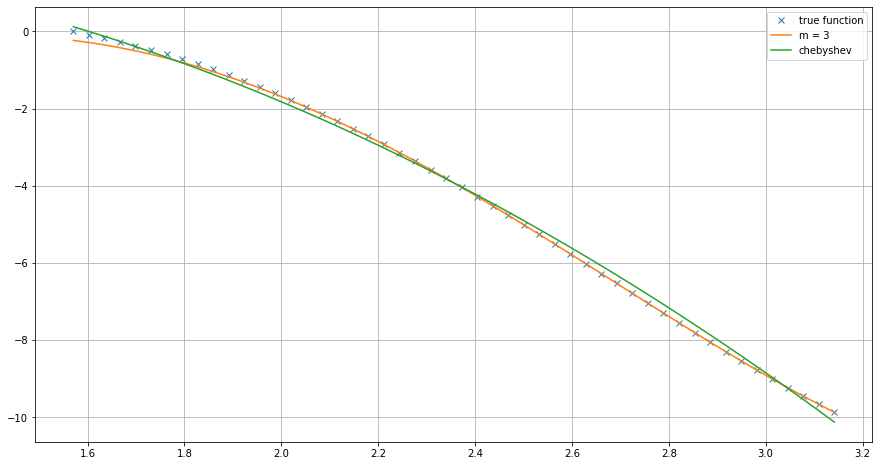

In [13]:
nodes_ = np.random.uniform(np.pi/2, np.pi, 3)
cheb_nodes = chebyshev_nodes(np.pi/2, np.pi, 3)

plt.figure(figsize=(15, 8))
plt.plot(x_space, f(x_space), 'x', lw=5,label='true function')
plt.plot(x_space, [lagrange(x_, nodes, f(nodes)) for x_ in x_space], label='m = 3')
plt.plot(x_space, [lagrange(x_, cheb_nodes, f(cheb_nodes)) for x_ in x_space], label='chebyshev')
plt.grid()
plt.legend()